<h2>Package import</h2>

In [108]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import ensemble, metrics
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC

In [109]:
df = pd.read_excel('Dataset/DataSet_Large Class - Round 3.xlsx')

In [110]:
cleanup_nums = {"Final annotation":     {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 0: 0}}

df= df.replace(cleanup_nums)

In [111]:
df.set_index('Code Snippet ID')

,Link,Code Smell,Project Link,CLOC,CELOC,NMD,NAD,NMD_NAD,WMC,WMC_NO_CASE,...,RFC,CBO,DIT,DCC,ATFD_10,NIC,Final annotation,1,2,3
Code Snippet ID,,,,,,,,,,,,,,,,,,,,,
Aseprite.AsepriteAnimation,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,6,0,0,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
Aseprite.AsepriteCel,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,14,2,0,9,9,2,2,...,0,1,0,1,0,0,0,0,0,0
Aseprite.AsepriteFrame,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,9,1,0,2,2,1,1,...,0,1,0,1,0,0,0,0,0,0
Aseprite.AsepriteImporter,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,6,1,1,0,1,1,1,...,0,1,0,1,0,0,0,0,0,0
Aseprite.AsepriteLayer,https://github.com/egordorichev/BurningKnight/...,Large Class,https://github.com/egordorichev/BurningKnight/...,51,2,0,9,9,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
osu.Game.Rulesets.Osu.Edit.Blueprints.Sliders.Components.PathControlPointVisualiser,https://github.com/ppy/osu/tree/2cac373365309a...,Large Class,https://github.com/ppy/osu/tree/2cac373365309a...,216,118,9,7,16,37,36,...,2,5,0,5,2,1,1,/,1,1
osu.Game.Overlays.Comments.CommentEditor,https://github.com/ppy/osu/tree/2cac373365309a...,Large Class,https://github.com/ppy/osu/tree/2cac373365309a...,224,81,2,8,10,8,8,...,1,2,0,3,1,2,1,/,1,1
osu.Game.Screens.Select.FilterQueryParser,https://github.com/ppy/osu/tree/2cac373365309a...,Large Class,https://github.com/ppy/osu/tree/2cac373365309a...,201,132,10,1,11,55,20,...,7,0,0,0,10,0,1,/,1,1


In [112]:
df_train, df_test, y_train, y_test = train_test_split(df, df['Final annotation'],stratify=df['Final annotation'], test_size=0.20, random_state=42)

<h2>Data normalization</h2>

In [113]:
column_names = ['CLOC','CELOC','NMD','NAD','NMD_NAD','WMC','WMC_NO_CASE','LCOM','LCOM3','LCOM4','TCC','ATFD','CNOR','CNOL','CNOC','CNOA','NOPM','CMNB','RFC','CBO','DIT','DCC','ATFD_10','NIC','NOPF']
features = df_train[column_names]


column_transformator = ColumnTransformer([('name', StandardScaler(), column_names)], remainder='passthrough')

scaled = column_transformator.fit(features)
X_train = scaled.transform(features)

test_features = df_test[column_names]

X_test= scaled.transform(test_features)

<h2>Random forest classifier</h2>

In [114]:
rf_classifier = RandomForestClassifier(n_estimators=314, random_state=42)

rf_model = rf_classifier.fit(X_train,y_train)

In [115]:
y_pred = rf_model.predict(X_test)

print("Classification report: \n", metrics.classification_report(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       136
           1       0.92      0.96      0.94        48

    accuracy                           0.97       184
   macro avg       0.95      0.96      0.96       184
weighted avg       0.97      0.97      0.97       184



In [116]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    #Define size of bar plot
    plt.figure(figsize=(12,12))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    print(fi_df)

   feature_names  feature_importance
6    WMC_NO_CASE            0.185704
0           CLOC            0.170383
5            WMC            0.140365
1          CELOC            0.100895
4        NMD_NAD            0.081557
14          CNOC            0.050827
15          CNOA            0.039460
18           RFC            0.033577
21           DCC            0.022513
11          ATFD            0.020689
3            NAD            0.019905
2            NMD            0.017932
17          CMNB            0.017803
8          LCOM3            0.012679
23           NIC            0.012564
7           LCOM            0.011474
12          CNOR            0.010627
22       ATFD_10            0.009908
19           CBO            0.008692
13          CNOL            0.007514
10           TCC            0.007395
16          NOPM            0.006407
20           DIT            0.004427
9          LCOM4            0.003701
24          NOPF            0.003001


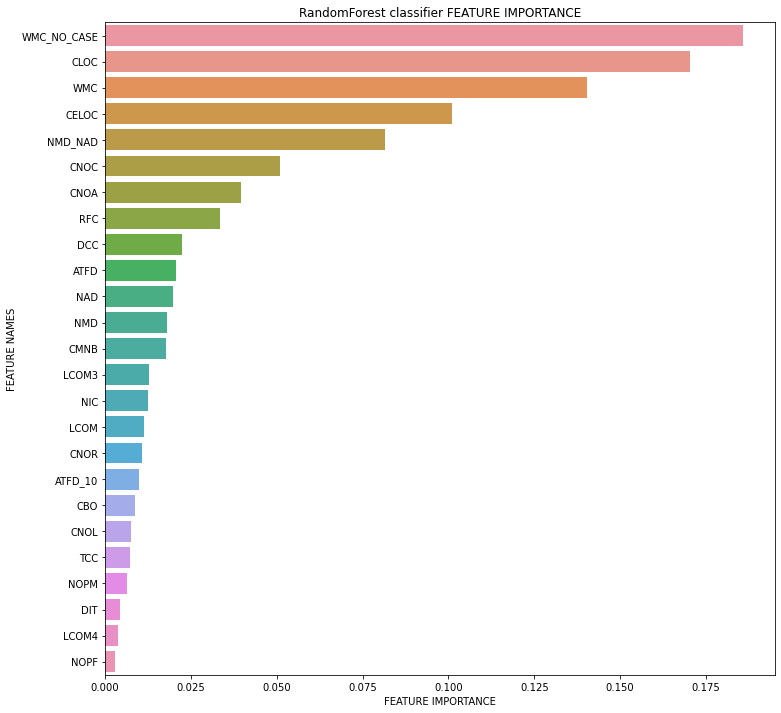

In [117]:
rf_feature_importance = rf_classifier.feature_importances_
plot_feature_importance(rf_feature_importance,column_names,'RandomForest classifier ')

<h2>Catboost classifier</h2>

In [118]:
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1)

cat_model.fit(X_train, y_train, verbose=False)

y_predicted = cat_model.predict(X_test)

In [119]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       136
           1       0.94      0.96      0.95        48

    accuracy                           0.97       184
   macro avg       0.96      0.97      0.97       184
weighted avg       0.97      0.97      0.97       184



   feature_names  feature_importance
0           CLOC           15.655360
6    WMC_NO_CASE           11.874096
4        NMD_NAD            8.866645
5            WMC            8.292633
1          CELOC            6.853965
18           RFC            6.411579
3            NAD            5.467422
23           NIC            4.475642
17          CMNB            3.932590
21           DCC            3.404987
11          ATFD            3.227028
2            NMD            2.907196
14          CNOC            2.830238
7           LCOM            2.603517
15          CNOA            2.167183
10           TCC            1.936144
8          LCOM3            1.862230
19           CBO            1.849663
22       ATFD_10            1.040226
13          CNOL            1.023465
16          NOPM            0.949628
20           DIT            0.853761
24          NOPF            0.793793
12          CNOR            0.704649
9          LCOM4            0.016359


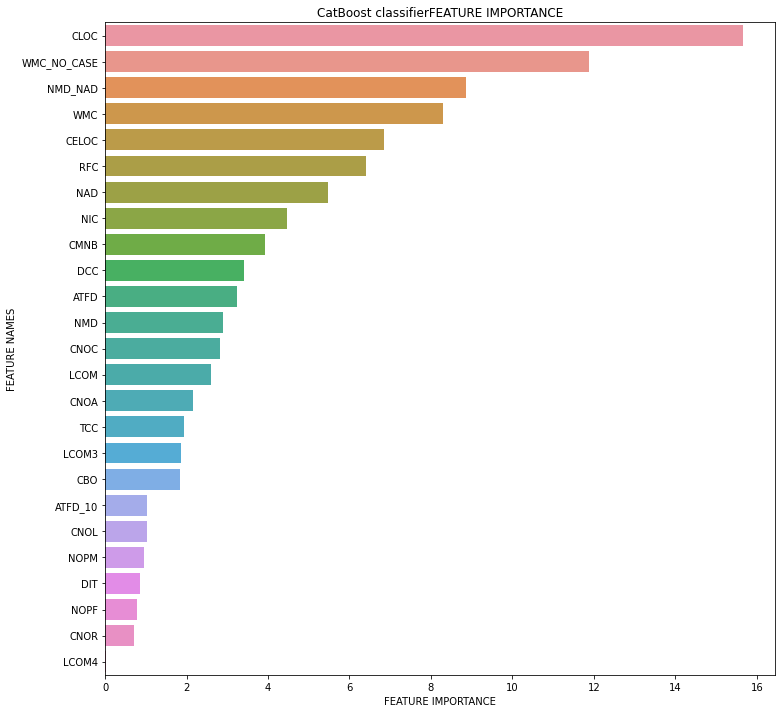

In [120]:
cat_feature_importance = cat_model.feature_importances_
plot_feature_importance(cat_feature_importance,column_names,'CatBoost classifier')

<h2>XGBoost classifier</h2>

In [121]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_predict = xgb_model.predict(X_test)

[10:57:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [122]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       136
           1       0.92      0.92      0.92        48

    accuracy                           0.96       184
   macro avg       0.94      0.94      0.94       184
weighted avg       0.96      0.96      0.96       184



   feature_names  feature_importance
6    WMC_NO_CASE            0.465387
5            WMC            0.135231
0           CLOC            0.052505
20           DIT            0.039956
23           NIC            0.029253
4        NMD_NAD            0.026375
22       ATFD_10            0.021365
18           RFC            0.020546
1          CELOC            0.020219
17          CMNB            0.019639
3            NAD            0.019471
21           DCC            0.019303
11          ATFD            0.018656
24          NOPF            0.016635
15          CNOA            0.013652
14          CNOC            0.013207
19           CBO            0.012855
12          CNOR            0.012411
13          CNOL            0.008168
10           TCC            0.007042
7           LCOM            0.006985
2            NMD            0.006699
8          LCOM3            0.005462
9          LCOM4            0.005245
16          NOPM            0.003733


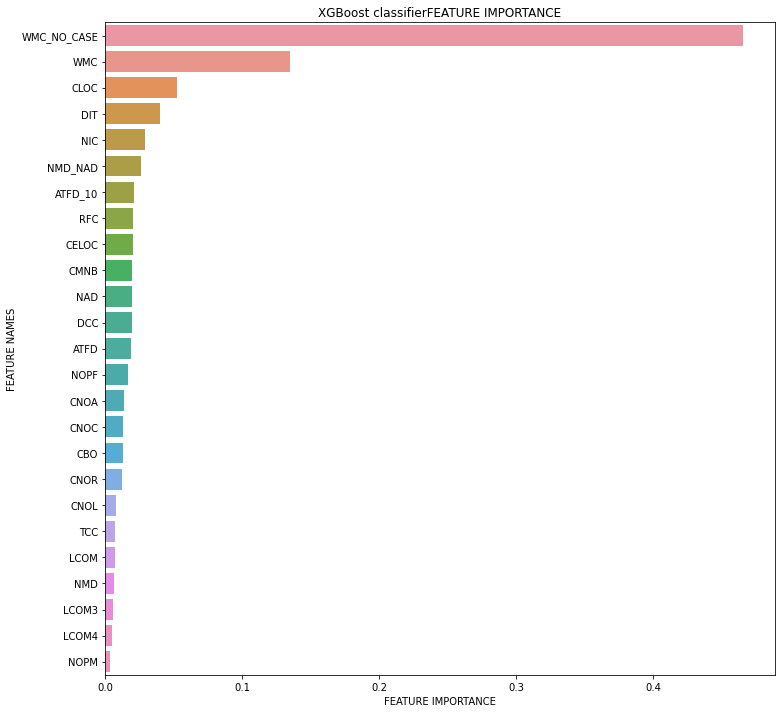

In [123]:
xgb_feature_importance = xgb_model.feature_importances_
plot_feature_importance(xgb_feature_importance,column_names,'XGBoost classifier')

<h2>Bagging classifier with linear svc as a base</h2>

In [124]:
svm = LinearSVC(random_state=42, max_iter = 2000) #default je 1000 za max_iter, mozda treba vise
bag_model = BaggingClassifier(base_estimator=svm, n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)

y_predicted = bag_model.predict(X_test)

C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Mihajlo\anaconda3\envs\diplomski\lib\site-pack

In [125]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.88      0.88      0.88        48

    accuracy                           0.93       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.93      0.93      0.93       184



In [126]:
bag_model.estimators_[0].coef_

array([[ 0.7778441 ,  1.14600091,  0.38354096,  0.51849882,  0.54581549,
         1.12907213, -0.97306578, -0.61027604,  0.51671039, -0.14768911,
        -0.04298661, -0.10605327,  0.54311978, -0.21074038,  1.31368239,
        -0.35944058, -0.18767391,  0.29406794,  0.99554678,  0.06151197,
         0.10528413, -0.20243271,  0.34069275,  0.42003983,  0.51074789]])

In [127]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

<AxesSubplot:>

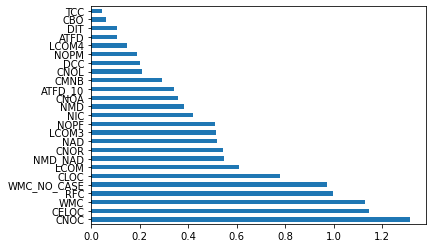

In [128]:
pd.Series(abs(bag_model.estimators_[0].coef_[0]), index=features.columns).nlargest(100).plot(kind='barh')